dataset: https://www.kaggle.com/ashaheedq/video-games-sales-2019?select=vgsales-12-4-2019.csv

# Dependencies

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf
import pandas as pd
pd.set_option('display.max_columns', None)
from tensorflow import keras 
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Loading and Processing Data

In [2]:
#read in train csv
df=pd.read_csv('resources/vgsales-12-4-2019.csv')
vgames = df.copy()
vgames.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [3]:
print(vgames.columns)

Index(['Rank', 'Name', 'basename', 'Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer', 'VGChartz_Score', 'Critic_Score',
       'User_Score', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 'PAL_Sales',
       'JP_Sales', 'Other_Sales', 'Year', 'Last_Update', 'url', 'status',
       'Vgchartzscore', 'img_url'],
      dtype='object')


In [4]:
vgames.drop(['Total_Shipped', 'Last_Update', 'url', 'status', 'Vgchartzscore', 'img_url'], axis=1, inplace=True)
vgames.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,User_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,NaN,NaN,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,9.1,NaN,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,8.8,NaN,NaN,NaN,NaN,NaN,2009.0


In [5]:
vgames.drop(['Developer', 'VGChartz_Score', 'Name','User_Score'], axis=1, inplace=True)
vgames.head()

,Rank,basename,Genre,ESRB_Rating,Platform,Publisher,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,wii-sports,Sports,E,Wii,Nintendo,7.7,NaN,NaN,NaN,NaN,NaN,2006.0
1,2,super-mario-bros,Platform,NaN,NES,Nintendo,10.0,NaN,NaN,NaN,NaN,NaN,1985.0
2,3,mario-kart-wii,Racing,E,Wii,Nintendo,8.2,NaN,NaN,NaN,NaN,NaN,2008.0
3,4,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,NaN,NaN,NaN,NaN,NaN,NaN,2017.0
4,5,wii-sports-resort,Sports,E,Wii,Nintendo,8.0,NaN,NaN,NaN,NaN,NaN,2009.0


In [6]:
vgames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          55792 non-null  int64  
 1   basename      55792 non-null  object 
 2   Genre         55792 non-null  object 
 3   ESRB_Rating   23623 non-null  object 
 4   Platform      55792 non-null  object 
 5   Publisher     55792 non-null  object 
 6   Critic_Score  6536 non-null   float64
 7   Global_Sales  19415 non-null  float64
 8   NA_Sales      12964 non-null  float64
 9   PAL_Sales     13189 non-null  float64
 10  JP_Sales      7043 non-null   float64
 11  Other_Sales   15522 non-null  float64
 12  Year          54813 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 5.5+ MB


In [7]:
vgames.isnull().sum()

Rank                0
basename            0
Genre               0
ESRB_Rating     32169
Platform            0
Publisher           0
Critic_Score    49256
Global_Sales    36377
NA_Sales        42828
PAL_Sales       42603
JP_Sales        48749
Other_Sales     40270
Year              979
dtype: int64

In [8]:
vgames = vgames.dropna()
vgames.head()

,Rank,basename,Genre,ESRB_Rating,Platform,Publisher,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
19,20,grand-theft-auto-v,Action,M,PS3,Rockstar Games,9.4,20.32,6.37,9.85,0.99,3.12,2013.0
20,21,grand-theft-auto-v,Action,M,PS4,Rockstar Games,9.7,19.39,6.06,9.71,0.60,3.02,2014.0
30,31,grand-theft-auto-vice-city,Action,M,PS2,Rockstar Games,9.6,16.15,8.41,5.49,0.47,1.78,2002.0
40,41,call-of-duty-modern-warfare-3,Shooter,M,X360,Activision,8.7,14.82,9.07,4.29,0.13,1.33,2011.0
41,42,call-of-duty-black-ops,Shooter,M,X360,Activision,8.8,14.74,9.76,3.73,0.11,1.14,2010.0


In [9]:
vgames.Genre.value_counts().head(50)

Role-Playing        226
Action              217
Shooter             200
Sports              118
Racing               97
Fighting             94
Platform             84
Adventure            64
Simulation           48
Misc                 42
Strategy             34
Puzzle               34
Action-Adventure     33
Music                 3
Party                 3
Sandbox               1
Board Game            1
MMO                   1
Name: Genre, dtype: int64

In [10]:
games = vgames.basename
vgames = vgames.drop('basename', axis =1)
vgames = pd.get_dummies(vgames)
vgames.shape

(1300, 135)

In [11]:
vgames.head()

,Rank,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Genre_Action,Genre_Action-Adventure,Genre_Adventure,Genre_Board Game,Genre_Fighting,Genre_MMO,Genre_Misc,Genre_Music,Genre_Party,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Sandbox,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,ESRB_Rating_E,ESRB_Rating_E10,ESRB_Rating_M,ESRB_Rating_T,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GBC,Platform_GC,Platform_N64,Platform_NS,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSN,Platform_PSP,Platform_PSV,Platform_SAT,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Publisher_2K Games,Publisher_2K Sports,Publisher_505 Games,Publisher_989 Studios,Publisher_AQ Interactive,Publisher_ASCII Entertainment,Publisher_Acclaim Entertainment,Publisher_Activision,Publisher_Agetec,Publisher_Aksys Games,Publisher_Arc System Works,Publisher_Atari,Publisher_Atlus,Publisher_Bandai,Publisher_Bandai Namco Entertainment,Publisher_Bandai Namco Games,Publisher_Bethesda Softworks,Publisher_Blizzard Entertainment,Publisher_CDV Software Entertainment,Publisher_Capcom,Publisher_City Interactive,Publisher_Codemasters,Publisher_D3 Publisher,Publisher_Deep Silver,Publisher_Disney Interactive Studios,Publisher_EA Sports,Publisher_Eidos Interactive,Publisher_Electronic Arts,Publisher_Enix,Publisher_GT Interactive,Publisher_Global Star Software,Publisher_Hello Games,Publisher_Hudson Soft,Publisher_Ignition Entertainment,Publisher_JoWood Productions,Publisher_KOEI,Publisher_Kalypso,Publisher_Koei Tecmo,Publisher_Konami,Publisher_Konami Digital Entertainment,Publisher_LucasArts,Publisher_Majesco,Publisher_Marvelous Interactive,Publisher_Maxis,Publisher_Microids,Publisher_Microsoft,Publisher_Microsoft Game Studios,Publisher_Microsoft Studios,Publisher_Midway Games,Publisher_Mojang,Publisher_NIS America,Publisher_Namco,Publisher_Namco Bandai,Publisher_Namco Bandai Games,Publisher_Natsume,Publisher_Nintendo,Publisher_Nippon Ichi Software,Publisher_Ocean,Publisher_RedOctane,Publisher_Rockstar Games,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Sony Computer Entertainment America,Publisher_Sony Interactive Entertainment,Publisher_Sony Online Entertainment,Publisher_SouthPeak Interactive,Publisher_Square,Publisher_Square EA,Publisher_Square Enix,Publisher_THQ,Publisher_Taito,Publisher_Take-Two Interactive,Publisher_Tecmo,Publisher_Tecmo Koei,Publisher_Touchstone,Publisher_Ubisoft,Publisher_Universal Interactive,Publisher_Valve,Publisher_Valve Corporation,Publisher_Warner Bros. Interactive,Publisher_Warner Bros. Interactive Entertainment,Publisher_Working Designs,Publisher_Xseed Games
19,20,9.4,20.32,6.37,9.85,0.99,3.12,2013.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,21,9.7,19.39,6.06,9.71,0.60,3.02,2014.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30,31,9.6,16.15,8.41,5.49,0.47,1.78,2002.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40,41,8.7,14.82,9.07,4.29,0.13,1.33,2011.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41,42,8.8,14.74,9.76,3.73,0.11,1.14,2010.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0

In [12]:
vgames['game'] = games

In [13]:
first_column = vgames.pop('game')
vgames.drop(['Rank'], axis=1, inplace=True)

vgames.insert(0, 'game', first_column)

In [14]:
vgames.head()

,game,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Genre_Action,Genre_Action-Adventure,Genre_Adventure,Genre_Board Game,Genre_Fighting,Genre_MMO,Genre_Misc,Genre_Music,Genre_Party,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Sandbox,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,ESRB_Rating_E,ESRB_Rating_E10,ESRB_Rating_M,ESRB_Rating_T,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GBC,Platform_GC,Platform_N64,Platform_NS,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSN,Platform_PSP,Platform_PSV,Platform_SAT,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Publisher_2K Games,Publisher_2K Sports,Publisher_505 Games,Publisher_989 Studios,Publisher_AQ Interactive,Publisher_ASCII Entertainment,Publisher_Acclaim Entertainment,Publisher_Activision,Publisher_Agetec,Publisher_Aksys Games,Publisher_Arc System Works,Publisher_Atari,Publisher_Atlus,Publisher_Bandai,Publisher_Bandai Namco Entertainment,Publisher_Bandai Namco Games,Publisher_Bethesda Softworks,Publisher_Blizzard Entertainment,Publisher_CDV Software Entertainment,Publisher_Capcom,Publisher_City Interactive,Publisher_Codemasters,Publisher_D3 Publisher,Publisher_Deep Silver,Publisher_Disney Interactive Studios,Publisher_EA Sports,Publisher_Eidos Interactive,Publisher_Electronic Arts,Publisher_Enix,Publisher_GT Interactive,Publisher_Global Star Software,Publisher_Hello Games,Publisher_Hudson Soft,Publisher_Ignition Entertainment,Publisher_JoWood Productions,Publisher_KOEI,Publisher_Kalypso,Publisher_Koei Tecmo,Publisher_Konami,Publisher_Konami Digital Entertainment,Publisher_LucasArts,Publisher_Majesco,Publisher_Marvelous Interactive,Publisher_Maxis,Publisher_Microids,Publisher_Microsoft,Publisher_Microsoft Game Studios,Publisher_Microsoft Studios,Publisher_Midway Games,Publisher_Mojang,Publisher_NIS America,Publisher_Namco,Publisher_Namco Bandai,Publisher_Namco Bandai Games,Publisher_Natsume,Publisher_Nintendo,Publisher_Nippon Ichi Software,Publisher_Ocean,Publisher_RedOctane,Publisher_Rockstar Games,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Sony Computer Entertainment America,Publisher_Sony Interactive Entertainment,Publisher_Sony Online Entertainment,Publisher_SouthPeak Interactive,Publisher_Square,Publisher_Square EA,Publisher_Square Enix,Publisher_THQ,Publisher_Taito,Publisher_Take-Two Interactive,Publisher_Tecmo,Publisher_Tecmo Koei,Publisher_Touchstone,Publisher_Ubisoft,Publisher_Universal Interactive,Publisher_Valve,Publisher_Valve Corporation,Publisher_Warner Bros. Interactive,Publisher_Warner Bros. Interactive Entertainment,Publisher_Working Designs,Publisher_Xseed Games
19,grand-theft-auto-v,9.4,20.32,6.37,9.85,0.99,3.12,2013.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,grand-theft-auto-v,9.7,19.39,6.06,9.71,0.60,3.02,2014.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30,grand-theft-auto-vice-city,9.6,16.15,8.41,5.49,0.47,1.78,2002.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40,call-of-duty-modern-warfare-3,8.7,14.82,9.07,4.29,0.13,1.33,2011.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41,call-of-duty

In [15]:
vgames.to_csv('resources/vgames_clean.csv')

In [16]:
def get_recommended(df, game, n_neighbors=10):
    
    #add filters here
    
    df_sub = df.drop(["game"], axis=1)
    model_knn = NearestNeighbors(metric='jaccard', n_neighbors=n_neighbors)
    model_knn.fit(df_sub)
    
    game_row = df.loc[df["game"] == game].head(1)
    game_row = game_row.drop(["game"], axis=1)
    game_row = game_row.to_numpy()
    
    distances, indices = model_knn.kneighbors(game_row, n_neighbors = n_neighbors)
    
    result = df.iloc[indices.flatten()]
    result["Distance"] = distances.flatten()
    
    return result

In [32]:
recom_result = get_recommended(vgames,'nba-live-08')
recom_result

C:\Users\Matt\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\Matt\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,game,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Genre_Action,Genre_Action-Adventure,Genre_Adventure,Genre_Board Game,Genre_Fighting,Genre_MMO,Genre_Misc,Genre_Music,Genre_Party,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Sandbox,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,ESRB_Rating_E,ESRB_Rating_E10,ESRB_Rating_M,ESRB_Rating_T,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GBC,Platform_GC,Platform_N64,Platform_NS,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSN,Platform_PSP,Platform_PSV,Platform_SAT,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Publisher_2K Games,Publisher_2K Sports,Publisher_505 Games,Publisher_989 Studios,Publisher_AQ Interactive,Publisher_ASCII Entertainment,Publisher_Acclaim Entertainment,Publisher_Activision,Publisher_Agetec,Publisher_Aksys Games,Publisher_Arc System Works,Publisher_Atari,Publisher_Atlus,Publisher_Bandai,Publisher_Bandai Namco Entertainment,Publisher_Bandai Namco Games,Publisher_Bethesda Softworks,Publisher_Blizzard Entertainment,Publisher_CDV Software Entertainment,Publisher_Capcom,Publisher_City Interactive,Publisher_Codemasters,Publisher_D3 Publisher,Publisher_Deep Silver,Publisher_Disney Interactive Studios,Publisher_EA Sports,Publisher_Eidos Interactive,Publisher_Electronic Arts,Publisher_Enix,Publisher_GT Interactive,Publisher_Global Star Software,Publisher_Hello Games,Publisher_Hudson Soft,Publisher_Ignition Entertainment,Publisher_JoWood Productions,Publisher_KOEI,Publisher_Kalypso,Publisher_Koei Tecmo,Publisher_Konami,Publisher_Konami Digital Entertainment,Publisher_LucasArts,Publisher_Majesco,Publisher_Marvelous Interactive,Publisher_Maxis,Publisher_Microids,Publisher_Microsoft,Publisher_Microsoft Game Studios,Publisher_Microsoft Studios,Publisher_Midway Games,Publisher_Mojang,Publisher_NIS America,Publisher_Namco,Publisher_Namco Bandai,Publisher_Namco Bandai Games,Publisher_Natsume,Publisher_Nintendo,Publisher_Nippon Ichi Software,Publisher_Ocean,Publisher_RedOctane,Publisher_Rockstar Games,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Sony Computer Entertainment America,Publisher_Sony Interactive Entertainment,Publisher_Sony Online Entertainment,Publisher_SouthPeak Interactive,Publisher_Square,Publisher_Square EA,Publisher_Square Enix,Publisher_THQ,Publisher_Taito,Publisher_Take-Two Interactive,Publisher_Tecmo,Publisher_Tecmo Koei,Publisher_Touchstone,Publisher_Ubisoft,Publisher_Universal Interactive,Publisher_Valve,Publisher_Valve Corporation,Publisher_Warner Bros. Interactive,Publisher_Warner Bros. Interactive Entertainment,Publisher_Working Designs,Publisher_Xseed Games,Distance
6662,nba-live-08,6.8,0.31,0.28,0.00,0.00,0.02,2007.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
5593,nba-live-09,6.1,0.39,0.23,0.07,0.03,0.06,2008.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.181818
6273,nba-2k10,5.5,0.33,0.30,0.00,0.00,0.03,2009.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.200000
8008,hot-shots-tennis-get-a-grip,8.0,0.23,0.08,0.00,0.13,0.02,2010.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.272727


In [33]:
for game in vgames.game:
    print(game)

grand-theft-auto-v
grand-theft-auto-v
grand-theft-auto-vice-city
call-of-duty-modern-warfare-3
call-of-duty-black-ops
red-dead-redemption-2
call-of-duty-modern-warfare-2
call-of-duty-wwii
call-of-duty-modern-warfare-3
grand-theft-auto-iii
call-of-duty-black-ops
fifa-18
grand-theft-auto-iv
fifa-17
call-of-duty-modern-warfare-2
grand-theft-auto-iv
call-of-duty-ghosts
call-of-duty-ghosts
halo-reach
call-of-duty-4-modern-warfare
the-elder-scrolls-v-skyrim
grand-theft-auto-v
fallout-4
fifa-16
star-wars-battlefront-2015
grand-theft-auto-liberty-city-stories
crash-bandicoot-2-cortex-strikes-back
call-of-duty-advanced-warfare
battlefield-3
battlefield-3
need-for-speed-underground
crash-bandicoot-3-warped
need-for-speed-underground-2
uncharted-3-drakes-deception
medal-of-honor-frontline
uncharted-2-among-thieves
call-of-duty-4-modern-warfare
fifa-soccer-12
red-dead-redemption
assassins-creed-iii
red-dead-redemption
the-elder-scrolls-v-skyrim
halo-3-odst
minecraft
fifa-15
the-last-of-us
driver
g

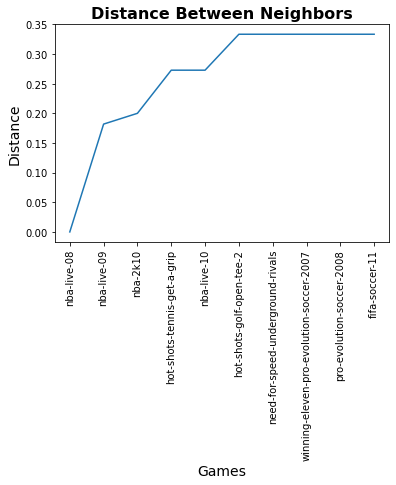

In [34]:
plt.plot(recom_result["game"], recom_result["Distance"])
plt.title("Distance Between Neighbors", fontsize=16, fontweight="bold")
plt.xlabel("Games", fontsize=14)
plt.xticks(rotation = 90)
plt.ylabel("Distance", fontsize=14)
plt.show()